In [133]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score

In [134]:
# load data
courtyard_observed = pd.read_csv('/Users/leeyilin/Downloads/netlogo/data/training test/courtyardrecorded.csv')
courtyard_predicted_sample = pd.read_csv('/Users/leeyilin/Downloads/netlogo/data/model/courtyard.csv').sample(n=8)
courtyard_predicted = pd.read_csv('/Users/leeyilin/Downloads/netlogo/data/model/courtyard.csv')

In [114]:
# view observed courtyard data
courtyard_observed

,Category,air temp,ground temp
0,0,33.2,45.2
1,1300,31.0,31.1
2,3900,33.1,35.2
3,5500,31.0,31.1
4,8400,32.5,36.1
5,9700,33.2,36.0
6,11000,33.4,38.0
7,15000,34.3,38.9


In [117]:
# view predicted courtyard data
courtyard_predicted.head()

,Category,air temp,ground temp
0,0,0.0,0.0
1,1,20.0,20.0
2,2,20.0,20.0
3,3,20.0,20.0
4,4,20.0,20.0


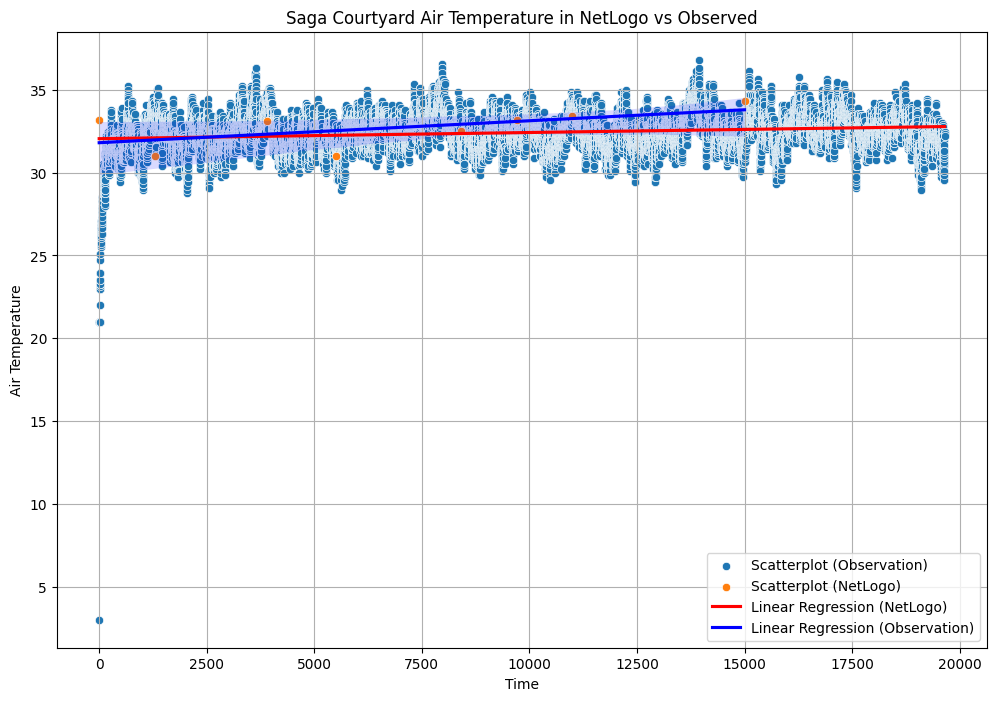

R Square Value: 0.24277214712872186


In [136]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=courtyard_predicted, x='Category', y='air temp', label='Scatterplot (Observation)')
sns.scatterplot(data=courtyard_observed, x='Category', y='air temp', label='Scatterplot (NetLogo)')
sns.regplot(data=courtyard_predicted, x= 'Category', y = 'air temp', scatter=False, color='red', label='Linear Regression (NetLogo)')
sns.regplot(data=courtyard_observed, x='Category', y='air temp', scatter=False, color='blue', label='Linear Regression (Observation)')
plt.grid(True)

plt.xlabel('Time')
plt.ylabel('Air Temperature')
plt.title('Saga Courtyard Air Temperature in NetLogo vs Observed')
plt.legend()

plt.show()
observed = courtyard_observed['air temp']
predicted = courtyard_predicted_sample['air temp']

# Calculate R-squared value
r_squared = r2_score(observed, predicted)
print("R Square Value: " + str(r_squared))


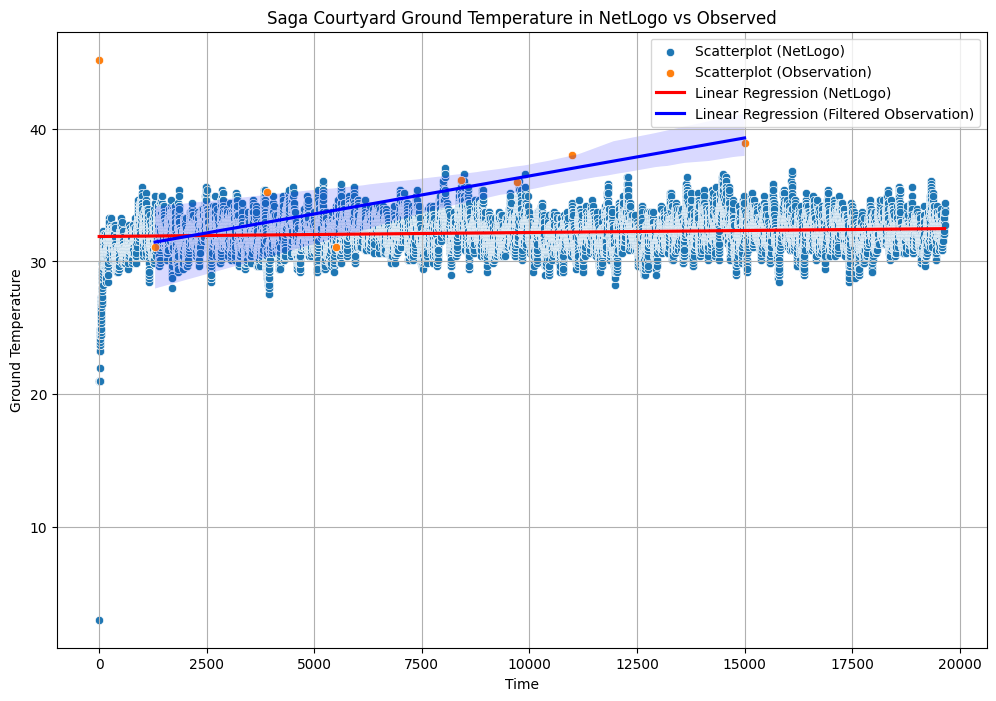

R Square Value: 0.14277214712872177


In [140]:
# Calculate the IQR
Q1 = courtyard_observed['ground temp'].quantile(0.25)
Q3 = courtyard_observed['ground temp'].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
filtered_observed = courtyard_observed[(courtyard_observed['ground temp'] >= lower_bound) & (courtyard_observed['ground temp'] <= upper_bound)]

# Plot the filtered data
plt.figure(figsize=(12, 8))
sns.scatterplot(data=courtyard_predicted, x='Category', y='ground temp', label='Scatterplot (NetLogo)')
sns.scatterplot(data=courtyard_observed, x='Category', y='ground temp', label='Scatterplot (Observation)')
sns.regplot(data=courtyard_predicted, x='Category', y='ground temp', scatter=False, color='red', label='Linear Regression (NetLogo)')
sns.regplot(data=filtered_observed, x='Category', y='ground temp', scatter=False, color='blue', label='Linear Regression (Filtered Observation)')
plt.grid(True)

plt.xlabel('Time')
plt.ylabel('Ground Temperature')
plt.title('Saga Courtyard Ground Temperature in NetLogo vs Observed')
plt.legend()

plt.show()

observed = courtyard_observed['air temp']
predicted = courtyard_predicted_sample['air temp']

# Calculate R-squared value
r_squared = r2_score(observed, predicted)
print("R Square Value: " + str(r_squared))
